<a href="https://colab.research.google.com/github/brianr114/pytorch_for_beginners/blob/examples/brian_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
root = "https://raw.githubusercontent.com/joe-papa/pytorch-beginners-course/main/assets/"
urls  = [
  [root+"tensor_batch_1.pt", "tensor_batch_1.pt"],
  [root+"tensor_batch_2.pt", "tensor_batch_2.pt"],
  [root+"tensor_batch_3.pt", "tensor_batch_3.pt"],
  [root+"tensor_batch_4.pt", "tensor_batch_4.pt"],
  [root+"tensor_batch_1-4.pt", "tensor_batch_1-4.pt"],
  [root+"imagenet_class_labels.txt", "imagenet_class_labels.txt"],
  ]

for url, fpath in urls:
  urllib.request.urlretrieve(url, fpath)

In [2]:
import torch
from torchvision import models
import matplotlib.pyplot as plt

In [17]:
img_tensor_batch = torch.load('tensor_batch_2.pt')
img_tensor_batch.shape

torch.Size([1, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


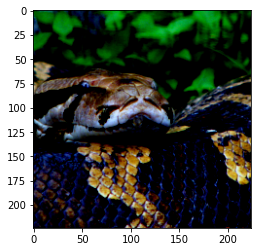

In [18]:
plt.imshow(img_tensor_batch.squeeze().permute(1,2,0)/img_tensor_batch.abs().max())

In [19]:
model = models.alexnet(pretrained=True)
model.eval();

In [20]:
y = model(img_tensor_batch)

In [21]:
# Rating for image against each classification in the model
y.shape

torch.Size([1, 1000])

In [22]:
_, index = y.max(1)
index

tensor([61])

In [23]:
with open('imagenet_class_labels.txt', 'r') as f:
  labels = eval(f.read())

In [24]:
labels[index.item()]

'boa constrictor, Constrictor constrictor'